<h1>I. ĐỌC DỮ LIỆU<h1>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
dataset = pd.read_csv("zoo.csv")

In [3]:
dataset.shape

(101, 18)

In [4]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<h1>II. TIỀN SỬ LÝ DỮ LIỆU (PREPROCESS).<h1>
<h2>2.1. Kiểm tra thiếu dữ liệu (missing data)<h2>

In [6]:
dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Vậy không có dữ liệu nào bị thiếu

<h2>2.2. Kiểm tra dữ liệu bị trùng (duplicated)<h2>

In [7]:
#Đếm số tên động vật (cột animal_name) bị trùng
duplicates = dataset.duplicated(['animal_name']).sum()
print(duplicates)

1


Vậy là có 1 tên động vật bị trùng

In [8]:
duplicates = dataset.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

Vậy có 2 con vật có chung tên "frog"

In [9]:
frog = dataset.loc[dataset["animal_name"]=="frog"]
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


Ta thấy, điểm khác biệt duy nhất giữa 2 con 'frog' là thuộc tính 'venomous'.<br>
Vậy, ta sẽ đổi tên một con thành 'venomous_frog'

In [10]:
#đổi tên một con 'frog' thành 'venomous_frog'
dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"

<ipython-input-10-3693c681610a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"


<h2>2.3. Kiểm tra kiểu dữ liệu và hiển thị hóa dữ liệu<h2>

In [11]:
class_dataset = pd.read_csv("class.csv")
class_dataset.shape


(7, 4)

In [12]:
class_dataset.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [13]:
p = pd.DataFrame(class_dataset, columns=['Class_Type', 'Number_Of_Animal_Species_In_Class'])
p.columns = ["Type", "Number"]
p['Percent'] = (p["Number"]/(p["Number"].sum())) * 100
p.sort_values(by=['Number'])
p

,Type,Number,Percent
0,Mammal,41,40.594059
1,Bird,20,19.801980
2,Reptile,5,4.950495
3,Fish,13,12.871287
4,Amphibian,4,3.960396
5,Bug,8,7.920792
6,Invertebrate,10,9.900990


<AxesSubplot:xlabel='Class_Type', ylabel='Number_Of_Animal_Species_In_Class'>

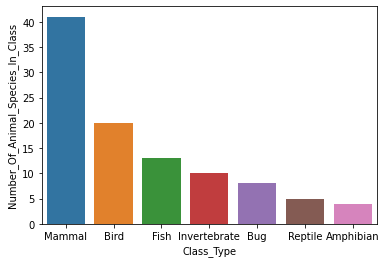

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.barplot(x='Class_Type', y='Number_Of_Animal_Species_In_Class', data=class_dataset, order=class_dataset.sort_values('Number_Of_Animal_Species_In_Class', ascending = False).Class_Type)

Như vậy có thể thấy Mammal là class nhiều ví dụ nhất với hơn 40 ví dụ

In [15]:
# Ở bước này ta ghép hai file zoo.csv và class.csv lại để thuận tiện cho việc xử lý
zoo_full = dataset.merge(class_dataset, how='left', left_on='class_type', right_on='Class_Number')
zoo_full.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [16]:
# Chỉ giữ lại những đặc điểm để phân loại trong dữ liệu ban đầu 
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
zoo_full["classtype"] = 1

feature_leg = []


In [17]:
# Dùng FacetGrid của Seaborn, ta có thể thấy được mức độ quan trọng của từng thuộc tính đối với các lớp 
# for i in feature:
#     g = sns.FacetGrid(zoo_full, col="Class_Type", row=i, hue="Class_Type")
#     g.map(plt.hist,"classtype")
#     g.set(xticklabels=[])
#     plt.subplots_adjust(top=0.9)
#     g.fig.suptitle(i)

<AxesSubplot:ylabel='Class_Type'>

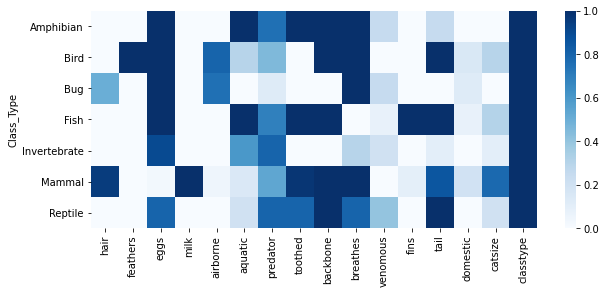

In [18]:
# Tại vì thuộc tính "legs" không phải kiểu nhị phân nên ta tạm bỏ nó ra để hiển thị hóa dữ liệu với heatmap 
heat = zoo_full.groupby(by='Class_Type').mean()
heat2 = heat.drop(columns=['class_type','Class_Number','Number_Of_Animal_Species_In_Class','legs'], axis=1)
plt.subplots(figsize=(10,4))
sns.heatmap(heat2, cmap="Blues")

<p> Thuộc tính "legs" sẽ được xét riêng <p>

<AxesSubplot:xlabel='Class_Type', ylabel='legs'>

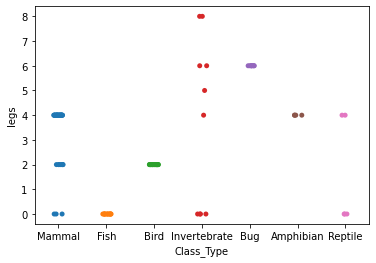

In [19]:
sns.stripplot(x=zoo_full['Class_Type'], y=zoo_full['legs'])

Từ đồ thị trên, ta có thể thấy thuộc tính "legs" khá đặc biệt, ví dụ như "Mammal" có thể có 0, 2, 4 chân, "Fish" chỉ có thể có 0 chân, nhưng có 0 chân có thể là "Mammal", "Fish", "Invertebrate". Nếu loài có 5 chân hoặc 8 chân thì chắc chắn là "Invertebrate"

<h2> 2.4. Xử lý feature "legs" </h2>

Do thuộc tính "legs" không phải nhị phân trong khi toàn bộ các thuộc tính còn lại đều là nhị phân, ta sẽ thử xử lý và huấn luyện model với thuộc tính "has_leg" (loài loài số chân lớn hơn 0 thì has_leg sẽ là 1 và ngược lại) thay cho thuộc tính "legs". Sau đó ta sẽ so sánh với model khi chưa xử lý thuộc tính "legs" để xem kết quả ra sao.

In [20]:
dataset_temp = dataset
dataset_temp['has_legs'] = np.where(dataset_temp['legs']>0,1,0)
dataset_temp.describe

<bound method NDFrame.describe of     animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  leg

In [21]:
feature_has_leg = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','has_legs','tail','domestic']

<h2>2.5. Train-test split<h2>

In [22]:
# Do tập dữ liệu bé nên ta sẽ để tỷ lệ training/testing là 50/50, "stratify=y" để cho các lớp tham gia vào training/testing sẽ có tỷ lệ giống nhau 
X = dataset[feature]
y = dataset['class_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

# Đối với feature has_leg
X_leg = dataset[feature_has_leg]
X_train_leg, X_test_leg, y_train_leg, y_test_leg = train_test_split(X_leg, y, test_size=0.5, random_state=1, stratify=y)


<h1>III. DECISION TREE CLASSIFICATION<h1>

<h2> 3.1. Sử dụng feature nguyên mẫu </h2>

In [23]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import *
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

pred = decisionTree.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.96

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       1.00      0.75      0.86         4
           7       0.83      1.00      0.91         5

    accuracy                           0.96        51
   macro avg       0.93      0.89      0.89        51
weighted avg       0.97      0.96      0.96        51



In [24]:
# Lưu giá trị score và cross validation để so sánh 

# accuracy
score_all = []
tree_score = decisionTree.score(X_test, y_test)

score_all.append(tree_score)
# print (score_all)

In [25]:
# cross_val
cv_all = []
cv_tree = cross_val_score(decisionTree, X, y, cv=10)
cv_all.append(cv_tree.mean())

Như vậy độ chính xác của model là 96%, các thông số precision, recall,... của các lớp 1-7 được thể hiện ở bảng trên

In [26]:
# Lớp 1-7 tương ứng với tên của chúng
zoo_full[['class_type', 'Class_Type']].drop_duplicates().sort_values(by='class_type')

,class_type,Class_Type
0,1,Mammal
11,2,Bird
62,3,Reptile
2,4,Fish
25,5,Amphibian
24,6,Bug
13,7,Invertebrate


Bây giờ ta sẽ kiếm tra mức độ quan trọng để phân loại của thuộc tính

In [27]:
importance = pd.DataFrame(decisionTree.feature_importances_)
feat = pd.DataFrame(feature)

feat_imp = pd.concat([feat, importance], axis=1, ignore_index=True)
feat_imp.columns = ["Features", "Importance"]
feat_imp.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp


,Features,Importance
3,milk,0.380454
1,feathers,0.213787
11,fins,0.140239
8,backbone,0.086346
6,predator,0.069808
13,tail,0.062827
12,legs,0.046539
0,hair,0.000000
2,eggs,0.000000
4,airborne,0.000000


Ta có thể thấy thuộc tính "milk" có khả năng phân loại cao nhất, và có rất nhiều thuộc tính mà khả năng phân loại gần như bằng 0

<h2> Ta thử mô hình hóa cây phân loại dưới dạng văn bản với các thuộc tính từ 0-14 cùng tên gọi được liệt kê ở trên </h2>

In [28]:
feat.columns=['Features']
feat

,Features
0,hair
1,feathers
2,eggs
3,milk
4,airborne
5,aquatic
6,predator
7,toothed
8,backbone
9,breathes


In [29]:
from sklearn import tree

text_representation = tree.export_text(decisionTree)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_12 <= 3.00
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_12 >  3.00
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: 4
|   |--- feature_1 >  0.50
|   |   |--- class: 2
|--- feature_3 >  0.50
|   |--- class: 1



feature_3 tức là thuộc tính "milk" có khả năng phân loại cao, nếu milk > 0.5 thì sẽ được phân vào lớp 1 - "Mammal" 

<h2> Và nếu ta mô hình hóa bằng hình ảnh thì sẽ có kết quả như sau: </h2>

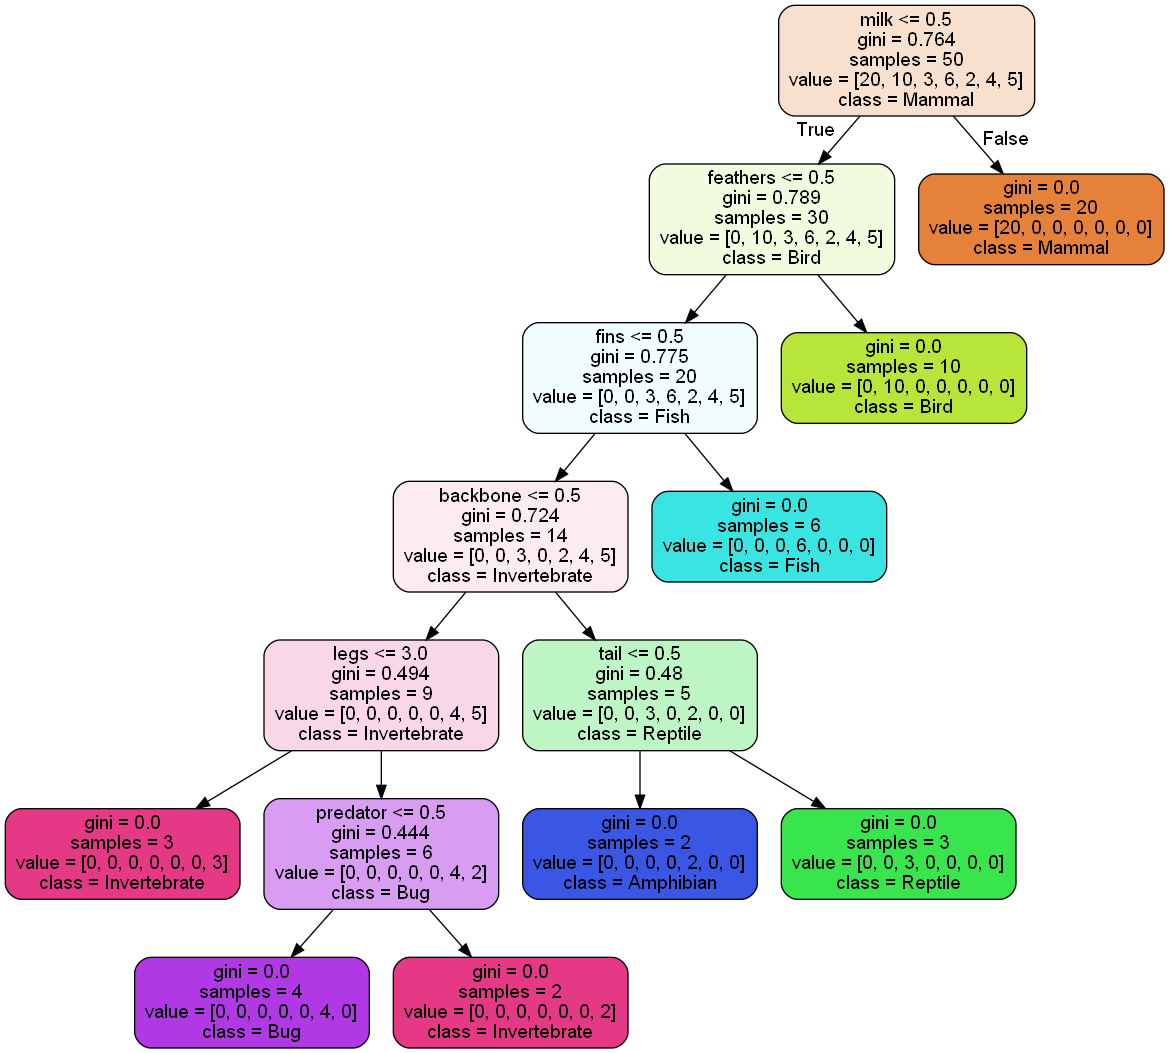

In [30]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data


global tree  
# Get the tree
tree = []
tree = decisionTree

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

<h2> 3.2. Chỉ sử dụng các feature quan trọng </h2>

Bây giờ ta sẽ thử huấn luyện lại model, nhưng sẽ chỉ dùng các thuộc tính mà mức độ quan trọng > 0 để xem kết quả có giống như trên hay không

In [31]:
chosen_feat = feat_imp[feat_imp['Importance'] > 0]
visible_feat = chosen_feat['Features']
visible_feat_sorted = visible_feat.sort_index()
visible_feat_sorted

1     feathers
3         milk
6     predator
8     backbone
11        fins
12        legs
13        tail
Name: Features, dtype: object

In [32]:
X2 = dataset[visible_feat_sorted]
y2 = dataset['class_type']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5, random_state=1, stratify=y2)

decisionTree2 = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree2.fit(X_train2, y_train2)

pred = decisionTree2.predict(X_test2)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree2.score(X_test2, y_test2)))
print()
print(confusion_matrix(y_test2, pred))
print()
print(classification_report(y_test2, pred))

Accuracy of classifier on test set: 0.90

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  4  1]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         4
           7       1.00      0.20      0.33         5

    accuracy                           0.90        51
   macro avg       0.88      0.81      0.78        51
weighted avg       0.95      0.90      0.89        51



Nhận thấy là accuracy đã giảm so với model trước

In [33]:
importance2 = pd.DataFrame(decisionTree2.feature_importances_)
feat2 = pd.DataFrame(visible_feat)

feat2.reset_index(drop=True, inplace=True)

feat_imp2 = pd.concat([feat2, importance2], axis=1, ignore_index=True)
feat_imp2.columns = ["Features", "Importance"]
feat_imp2.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp2


,Features,Importance
1,feathers,0.380454
0,milk,0.213787
4,predator,0.140239
5,tail,0.116347
3,backbone,0.086346
6,legs,0.062827
2,fins,0.000000


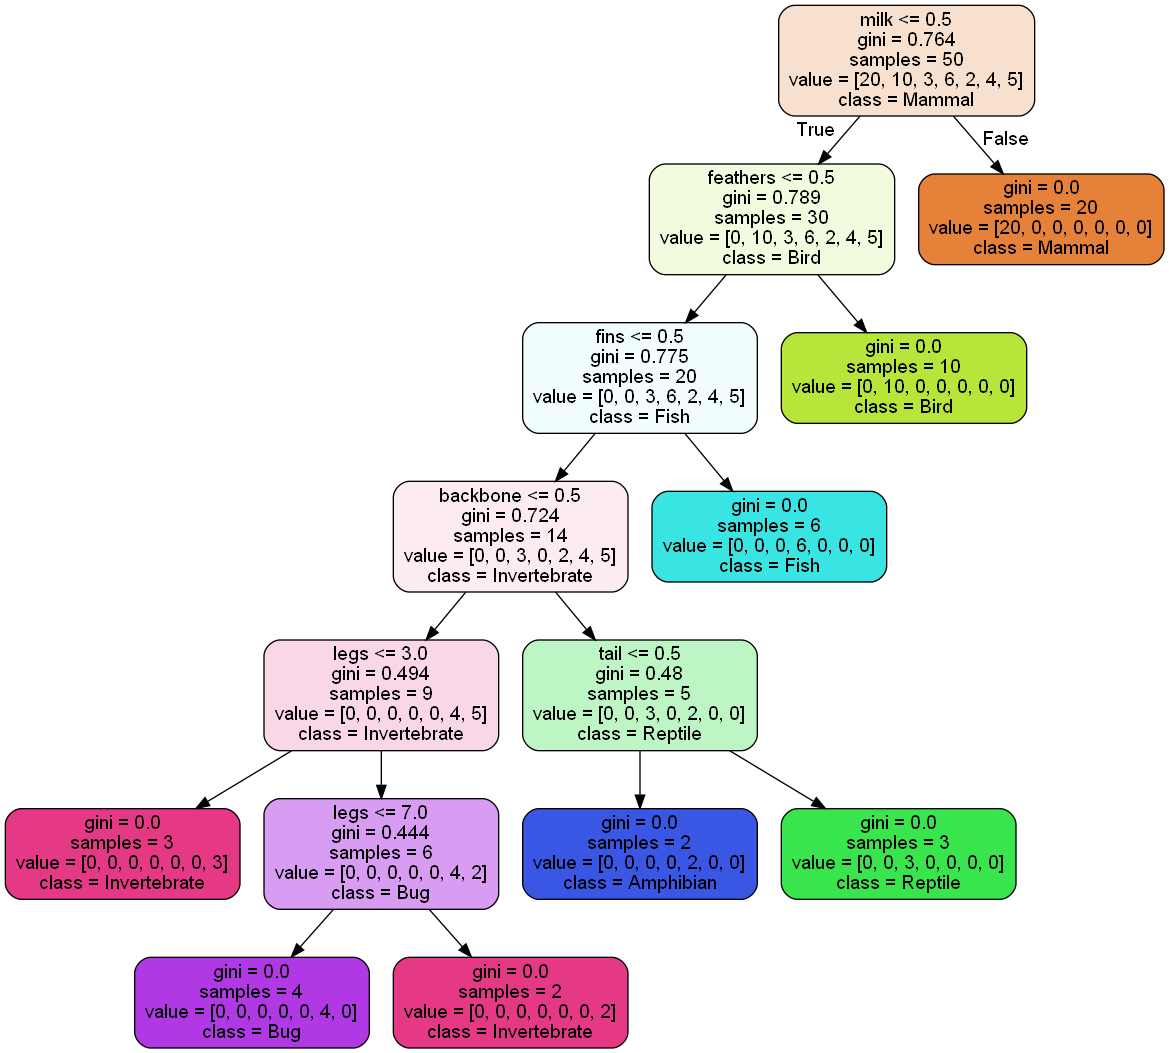

In [34]:
tree = decisionTree2

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X2.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

Và kết quả hoàn toàn giống như trước. Vì thế ta thấy là không nên sử dụng quá nhiều thuộc tính, mà chỉ nên sử dụng một vài thuộc tính quan trọng để cho model không phải tính toán quá nhiều

<h2> 3.3 Sử dụng feature_has_leg </h2>

In [35]:
decisionTree_leg = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree_leg.fit(X_train_leg, y_train_leg)

pred_leg = decisionTree_leg.predict(X_test_leg)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree_leg.score(X_test_leg, y_test_leg)))
print()
print(confusion_matrix(y_test_leg, pred_leg))
print()
print(classification_report(y_test_leg, pred_leg))

Accuracy of classifier on test set: 0.96

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         7
           5       0.67      1.00      0.80         2
           6       1.00      0.75      0.86         4
           7       0.83      1.00      0.91         5

    accuracy                           0.96        51
   macro avg       0.93      0.89      0.89        51
weighted avg       0.97      0.96      0.96        51



In [36]:
# Lưu giá trị score và cross validation để so sánh 
score_leg_all = []
tree_leg_score = decisionTree_leg.score(X_test_leg, y_test_leg)

score_leg_all.append(tree_leg_score)

In [37]:
# cross validation
cv_leg_all = []
cv_tree_leg = cross_val_score(decisionTree_leg, X_leg, y, cv=10)
cv_leg_all.append(cv_tree_leg.mean())

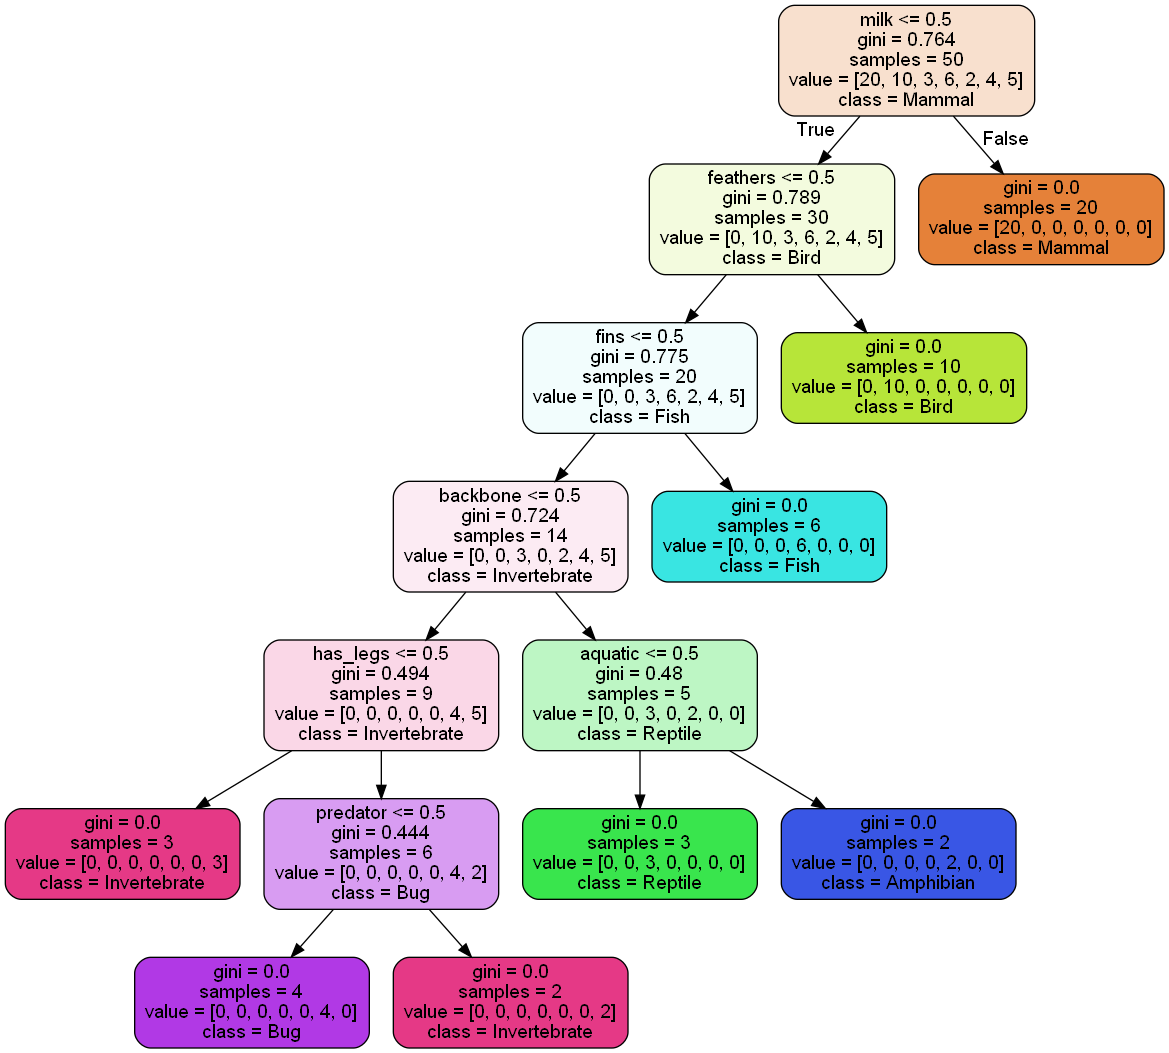

In [38]:
tree = decisionTree_leg

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X_leg.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

<h1>IV. RANDOM FOREST<h1>

<h2> 4.1. Dùng feature ban đầu </h2>

In [39]:
from sklearn.ensemble import RandomForestClassifier
#name of model is: randomForest

randomForest = RandomForestClassifier(n_estimators=40) 
# Sử dụng 40 cây để phân loại
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [40]:
randomForest.score(X_test, y_test)

0.9607843137254902

In [41]:
score_all.append(randomForest.score(X_test, y_test))

In [42]:
cv_forest = cross_val_score(randomForest, X, y, cv=10)
cv_all.append(cv_forest.mean())

In [43]:
y_predicted = randomForest.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

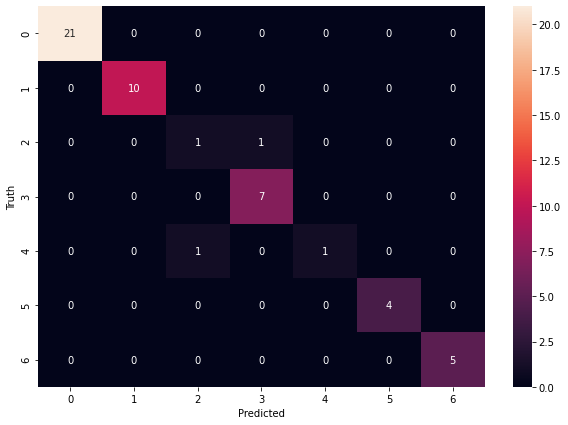

In [45]:
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>**Nhận xét**  <h3>
Độ chính xác khá cao, tuy nhiên có 2 trường hợp phân loại chưa đúng 

Best Score =  0.9803921568627451
Best n_estimators =  50


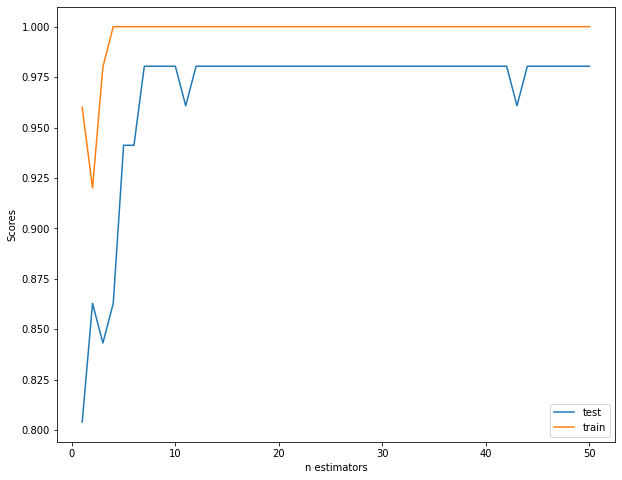

In [46]:
s_max = 0
rf_train_score_list = []
rf_test_score_list = []
for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

plt.figure(figsize = (10,8))
plt.plot(range(1,X_train.shape[0]+1),rf_test_score_list,label = "test")
plt.plot(range(1,X_train.shape[0]+1),rf_train_score_list,label = "train")
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Scores")
plt.show()

<h3> ĐỒ THỊ THỂ HIỆN ĐỘ CHÍNH XÁC CỦA MÔ HÌNH ỨNG VỚI SỐ LƯỢNG CÂY THAM GIA PHÂN LOẠI</h3>


<h2> **Nhận xét**  </h2>
<h3> Độ chính xác cao khi số lượng cây lớn, và điểm cao nhất ứng với số lượng cây 50 là 0.9803921568627451 </h3>

<h2> 4.2. Chỉ sử dụng feature quan trọng </h2>

Bây giờ ta sẽ kiểm tra độ quan trọng của thuộc tính để phân loại

In [47]:
importance_forest = pd.DataFrame(randomForest.feature_importances_)
feat_forest = pd.DataFrame(feature)

feat_imp_forest = pd.concat([feat_forest, importance_forest], axis=1, ignore_index=True)
feat_imp_forest.columns = ["Features", "Importance"]
feat_imp_forest.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp

,Features,Importance
3,milk,0.380454
1,feathers,0.213787
11,fins,0.140239
8,backbone,0.086346
6,predator,0.069808
13,tail,0.062827
12,legs,0.046539
0,hair,0.000000
2,eggs,0.000000
4,airborne,0.000000


Giờ ta thử huấn luyện lại model, những chỉ giữ lại vài thuộc tính có độ quan trọng > 0.06 để xem kết quả thay đổi ra sao

In [48]:
chosen_feat_forest = feat_imp_forest[feat_imp_forest['Importance'] > 0.06]
visible_feat_forest = chosen_feat_forest['Features']
visible_feat_forest_sorted = visible_feat_forest.sort_index()
visible_feat_forest_sorted

0         hair
1     feathers
2         eggs
3         milk
7      toothed
8     backbone
9     breathes
12        legs
13        tail
Name: Features, dtype: object

In [49]:
X_imp_forest = dataset[visible_feat_forest_sorted]
# y2 = dataset['class_type']

X_train_imp_forest, X_test_imp_forest, y_train_imp_forest, y_test_imp_forest = train_test_split(X_imp_forest, y, test_size=0.5, random_state=1, stratify=y)

randomForest2 = RandomForestClassifier(n_estimators=40)
randomForest2.fit(X_train_imp_forest, y_train_imp_forest)

pred = randomForest2.predict(X_test_imp_forest)
print('Accuracy of classifier on test set: {:.2f}'
     .format(randomForest2.score(X_test_imp_forest, y_test_imp_forest)))
print()
print(confusion_matrix(y_test_imp_forest, pred))
print()
print(classification_report(y_test_imp_forest, pred))

Accuracy of classifier on test set: 0.90

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  3  2]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.50      0.50      0.50         2
           4       0.88      1.00      0.93         7
           5       1.00      0.50      0.67         2
           6       0.57      1.00      0.73         4
           7       1.00      0.40      0.57         5

    accuracy                           0.90        51
   macro avg       0.85      0.77      0.77        51
weighted avg       0.93      0.90      0.89        51



Nhận thấy là accuracy có lúc tăng có lúc giảm so với model trước

<h2>4.3. Dùng feature_has_leg </h2>

In [50]:
randomForest_leg = RandomForestClassifier(n_estimators=40)
randomForest_leg.fit(X_train_leg, y_train_leg)

randomForest_leg.score(X_test_leg, y_test_leg)

0.9803921568627451

In [51]:
score_leg_all.append(randomForest_leg.score(X_test_leg, y_test_leg))

In [52]:
cv_forest_leg = cross_val_score(randomForest_leg, X_leg, y, cv=10)
cv_leg_all.append(cv_forest_leg.mean())

Text(69.0, 0.5, 'Truth')

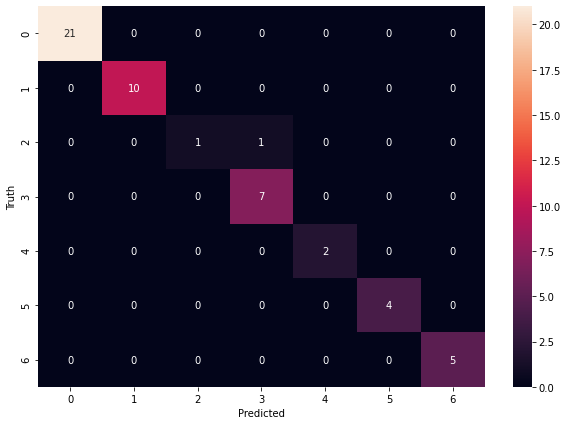

In [53]:
y_predicted_leg = randomForest_leg.predict(X_test_leg)
cm_leg = confusion_matrix(y_test_leg, y_predicted_leg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_leg, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Best Score =  0.9803921568627451
Best n_estimators =  41


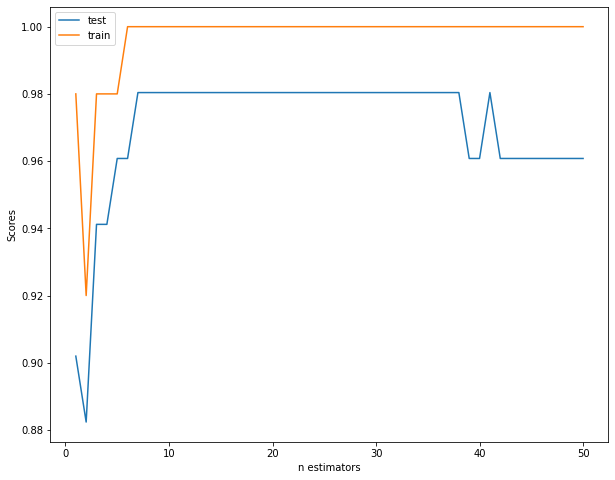

In [54]:
s_max = 0
rf_train_score_list = []
rf_test_score_list = []
for i in range(1,X_train_leg.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train_leg,y_train_leg)
    test_score = rf.score(X_test_leg,y_test_leg)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train_leg,y_train_leg)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

plt.figure(figsize = (10,8))
plt.plot(range(1,X_train_leg.shape[0]+1),rf_test_score_list,label = "test")
plt.plot(range(1,X_train_leg.shape[0]+1),rf_train_score_list,label = "train")
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Scores")
plt.show()

<h1>V. K-NEAREST NEIGHBORS<h1>

<h2> 5.1. Sử dụng feature ban đầu </h2>

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = knn.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred))

[[20  0  0  1  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  1  0  1  2  1]]


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         2
           4       0.70      1.00      0.82         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         4
           7       1.00      0.20      0.33         5

    accuracy                           0.82        51
   macro avg       0.62      0.59      0.56        51
weighted avg       0.85      0.82      0.81        51



Đồ thị biểu diễn số con vật ở mỗi lớp dựa theo tập dữ liệu thử và tập dữ liệu dự đoán

In [59]:
knn_score = accuracy_score(y_pred,y_test)
score_all.append(knn_score)

In [60]:
cv_knn = cross_val_score(knn, X, y, cv=10)
cv_all.append(cv_knn.mean())

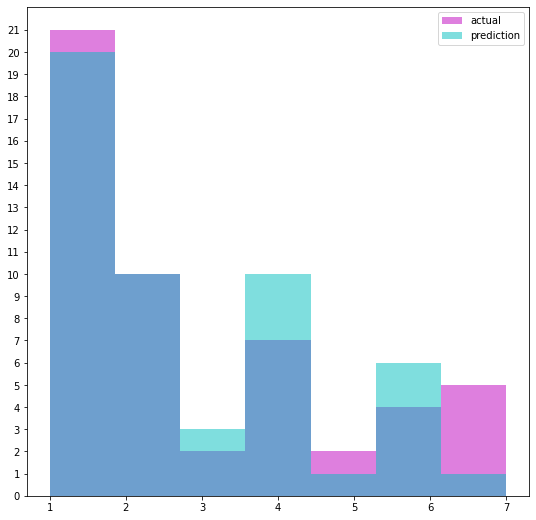

In [61]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,22))
ax.legend(loc = 'best')
plt.show()

<h3> ** Nhận xét **</h3>
Ta thấy tập dữ liệu dự đoán khớp gần hết với phân loại thực tế của các con vật, tuy nhiên vẫn có những trường hợp bị phân loại nhầm 1 hay vài con vật

<h3> Chuẩn bị dữ liệu để mô hình hóa </h3>

In [62]:
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

<h3>Vẽ đồ thị</h3>
Việc mô hình hóa sẽ giúp chúng ta có 1 cái nhìn trực quan hơn khi chọn giá trị của K để model hoạt động chính xác nhất

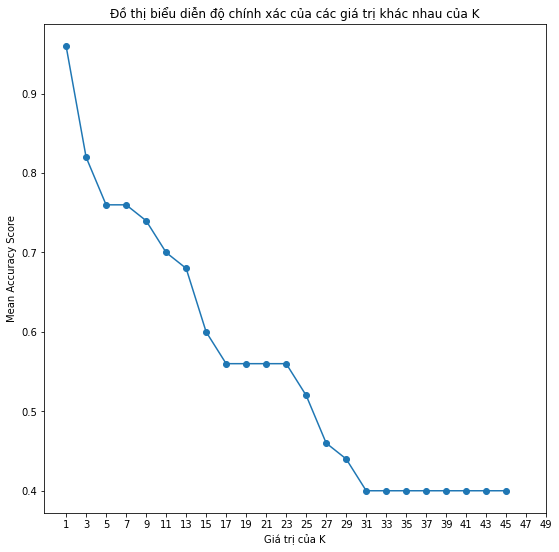

In [63]:
#Thêm thuộc tính cho đồ thị
plt.plot(k_list,mean_scores, marker='o')
plt.title('Đồ thị biểu diễn độ chính xác của các giá trị khác nhau của K')
plt.xlabel("Giá trị của K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (15,12)

plt.show()

** Nhận xét **
Ta thấy độ chính xác của model càng giảm khi tăng giá trị của K

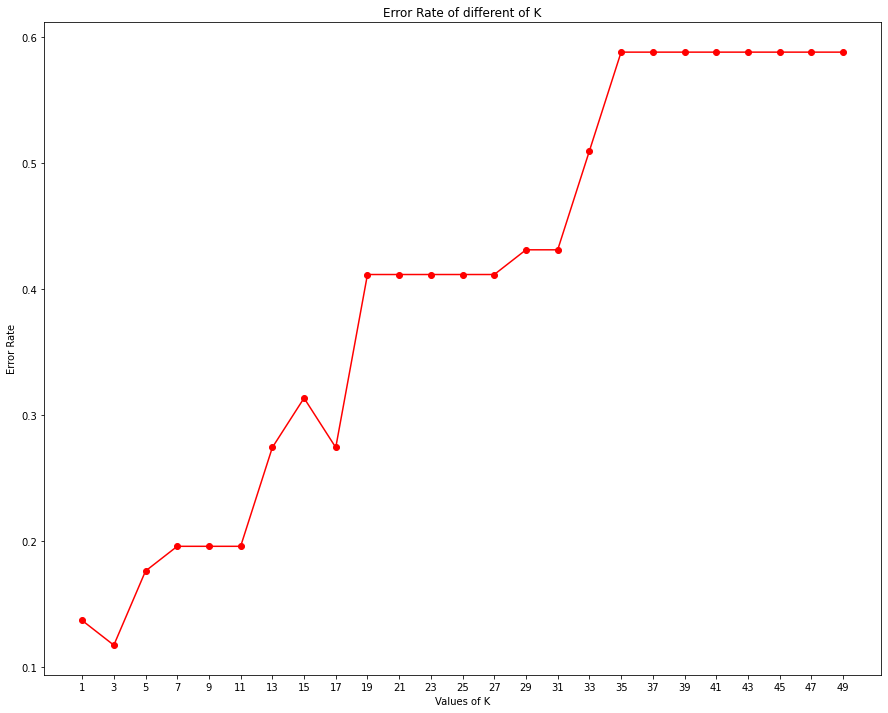

In [64]:
plt.plot(k_list,error_rate, color='r', marker = 'o')
plt.title('Error Rate of different of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

** Nhận xét **
Ta thấy rằng khi tắng giá trị của K thì tỉ lệ lỗi của model cũng tăng theo

<h2>5.2. Sử dụng feature_has_leg </h2>

In [65]:
knn_leg = KNeighborsClassifier(n_neighbors = 5)
knn_leg.fit(X_train_leg, y_train_leg)

KNeighborsClassifier()

In [66]:
y_pred_leg = knn_leg.predict(X_test_leg)

In [67]:
print(confusion_matrix(y_test_leg,y_pred_leg))

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  4  1]]


In [68]:
print(classification_report(y_test_leg,y_pred_leg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.50      0.50      0.50         2
           4       0.88      1.00      0.93         7
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         4
           7       1.00      0.20      0.33         5

    accuracy                           0.88        51
   macro avg       0.84      0.74      0.73        51
weighted avg       0.92      0.88      0.87        51



In [69]:
knn_leg_score = accuracy_score(y_pred_leg,y_test_leg)
score_leg_all.append(knn_leg_score)

In [70]:
cv_knn_leg = cross_val_score(knn_leg, X_leg, y, cv=10)
cv_leg_all.append(cv_knn_leg.mean())

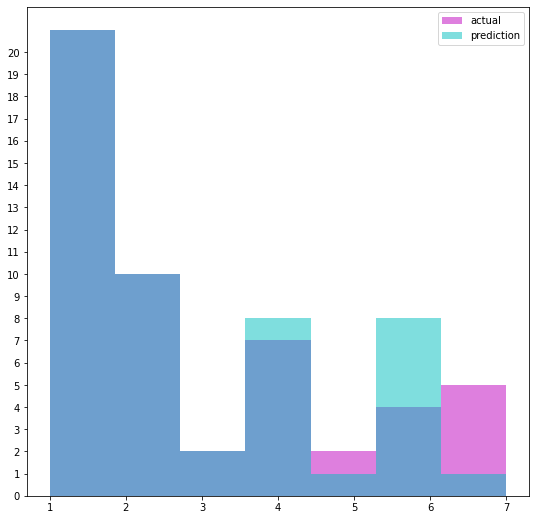

In [71]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test_leg, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred_leg, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,21))
ax.legend(loc = 'best')
plt.show()

In [72]:
k_list = np.arange(1, 50, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train_leg,y_train_leg)
    pred_i = knn2.predict(X_test_leg)
    score2 = cross_val_score(knn2,X_train_leg, y_train_leg,cv=10)
    mean_scores2.append(np.mean(score2))
    error_rate2.append(np.mean(pred_i != y_test_leg))

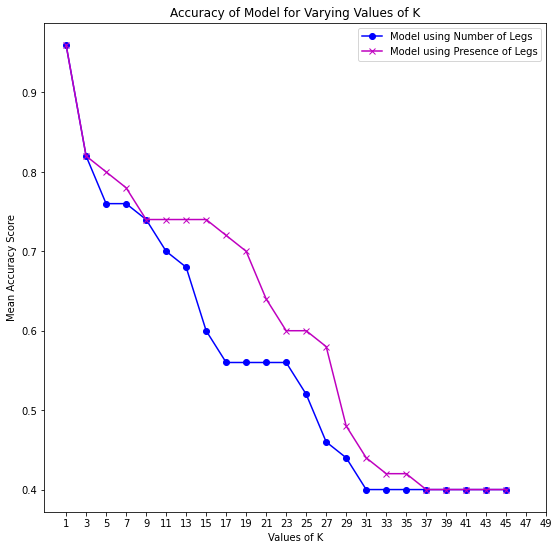

In [73]:
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

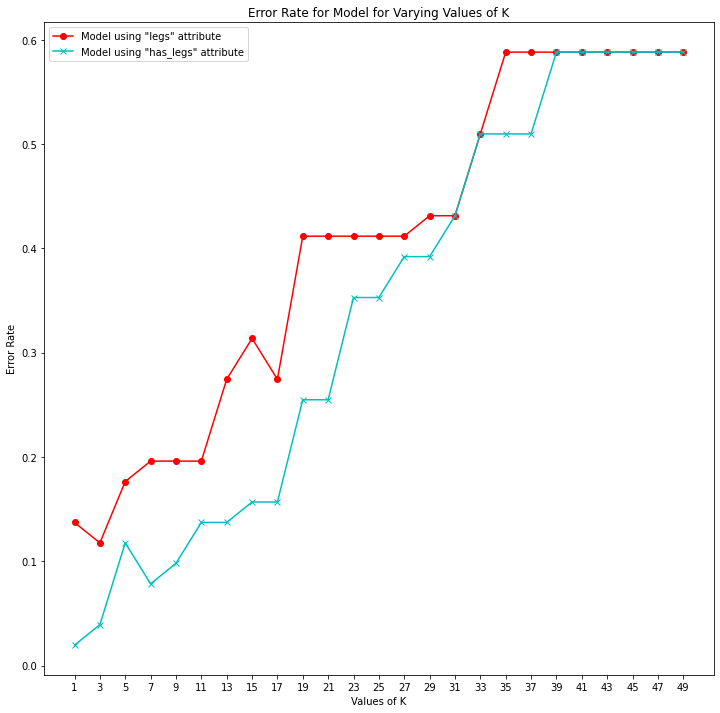

In [74]:
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using "legs" attribute')
plt.plot(k_list,error_rate2, color='c', marker = 'x', label='Model using "has_legs" attribute')

plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

Ta thấy rằng độ chính xác của model mới tốt hơn khá nhiều và tỉ lệ lỗi cũng thấp hơn

<h1>VI. SUPPORT VECTOR MACHINE<h1>

<h2> 6.1. Dùng feature ban đầu </h2>

In [75]:
from sklearn.svm import SVC
#declare model
svm = SVC(kernel = 'linear', C = 1e5)
#fit model
svm.fit(X_train, y_train)

SVC(C=100000.0, kernel='linear')

In [76]:
#check accuracy:
y_pred_svm = svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_svm, y_test)
print(accuracy)

0.9411764705882353


In [77]:
score_all.append(accuracy)

In [78]:
cv_svm = cross_val_score(svm, X, y, cv=10)
cv_all.append(cv_svm.mean())

<h2> 6.2. Dùng feature_has_leg </h2>

In [79]:
svm_leg = SVC(kernel = 'linear', C = 1e5)
#fit model
svm_leg.fit(X_train_leg, y_train_leg)

y_pred_svm_leg = svm_leg.predict(X_test_leg)

accuracy_leg = accuracy_score(y_pred_svm_leg, y_test_leg)
print(accuracy_leg)

0.9607843137254902


In [80]:
score_leg_all.append(accuracy_leg)

In [81]:
cv_svm_leg = cross_val_score(svm_leg, X_leg, y, cv=10)
cv_leg_all.append(cv_svm_leg.mean())

<h1>VII. NAIVE-BAYES CLASSIFICATION<h1>


<h2> 7.1. Dùng feature ban đầu </h2>

In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("Test Accurary : ",nb.score(X_test,y_test))
print("Train Accurary : ",nb.score(X_train,y_train))

Test Accurary :  0.9803921568627451
Train Accurary :  1.0


In [83]:
score_all.append(nb.score(X_test,y_test))

In [84]:
cv_nb = cross_val_score(nb, X, y, cv=10)
cv_all.append(cv_nb.mean())

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
cm_nb = confusion_matrix(y_test,y_pred_nb)
cr_nb = classification_report(y_test,y_pred_nb)
print("confusion matrix : \n",cm_nb)
print("classification report : \n",cr_nb)

confusion matrix : 
 [[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5

    accuracy                           0.98        51
   macro avg       0.98      0.93      0.94        51
weighted avg       0.98      0.98      0.98        51



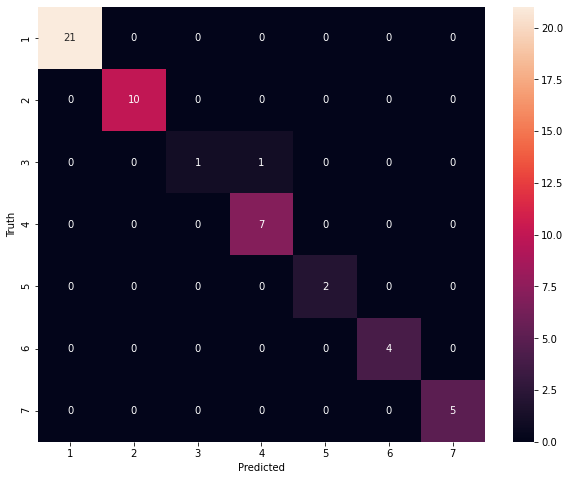

In [86]:
%matplotlib inline

plt.figure(figsize = (10,8))
sns.heatmap(cm_nb,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h2> 7.2. Dùng feature_has_leg </h2>

In [87]:
nb_leg = GaussianNB()
nb_leg.fit(X_train_leg,y_train_leg)
y_pred_nb_leg = nb_leg.predict(X_test_leg)
print("Test Accurary : ", nb_leg.score(X_test_leg,y_test_leg))
print("Train Accurary : ", nb_leg.score(X_train_leg,y_train_leg))

Test Accurary :  0.9803921568627451
Train Accurary :  1.0


In [88]:
score_leg_all.append(nb_leg.score(X_test_leg,y_test_leg))

In [89]:
cv_nb_leg = cross_val_score(nb_leg, X_leg, y, cv=10)
cv_leg_all.append(cv_nb_leg.mean())

In [90]:
cm_nb_leg = confusion_matrix(y_test_leg,y_pred_nb_leg)
cr_nb_leg = classification_report(y_test_leg,y_pred_nb_leg)
print("confusion matrix : \n",cm_nb_leg)
print("classification report : \n",cr_nb_leg)

confusion matrix : 
 [[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5

    accuracy                           0.98        51
   macro avg       0.98      0.93      0.94        51
weighted avg       0.98      0.98      0.98        51



<h1> VII. So sánh các model </h1>

<h2> 8.1. So sánh accuracy </h2>

In [91]:
print(score_all)
print(score_leg_all)
model = ['Decision tree', 'Random forest','KNN','SVM','Naive Bayes']
df_accuracy = pd.DataFrame(data=zip(model, score_all, score_leg_all), columns=['Model', 'Using number of leg', 'Using presence of leg'])
df_accuracy

[0.9607843137254902, 0.9607843137254902, 0.8235294117647058, 0.9411764705882353, 0.9803921568627451]
[0.9607843137254902, 0.9803921568627451, 0.8823529411764706, 0.9607843137254902, 0.9803921568627451]


,Model,Using number of leg,Using presence of leg
0,Decision tree,0.960784,0.960784
1,Random forest,0.960784,0.980392
2,KNN,0.823529,0.882353
3,SVM,0.941176,0.960784
4,Naive Bayes,0.980392,0.980392


In [92]:
df = pd.melt(df_accuracy, id_vars="Model", var_name="Type", value_name="Accuracy")
df


,Model,Type,Accuracy
0,Decision tree,Using number of leg,0.960784
1,Random forest,Using number of leg,0.960784
2,KNN,Using number of leg,0.823529
3,SVM,Using number of leg,0.941176
4,Naive Bayes,Using number of leg,0.980392
5,Decision tree,Using presence of leg,0.960784
6,Random forest,Using presence of leg,0.980392
7,KNN,Using presence of leg,0.882353
8,SVM,Using presence of leg,0.960784
9,Naive Bayes,Using presence of leg,0.980392


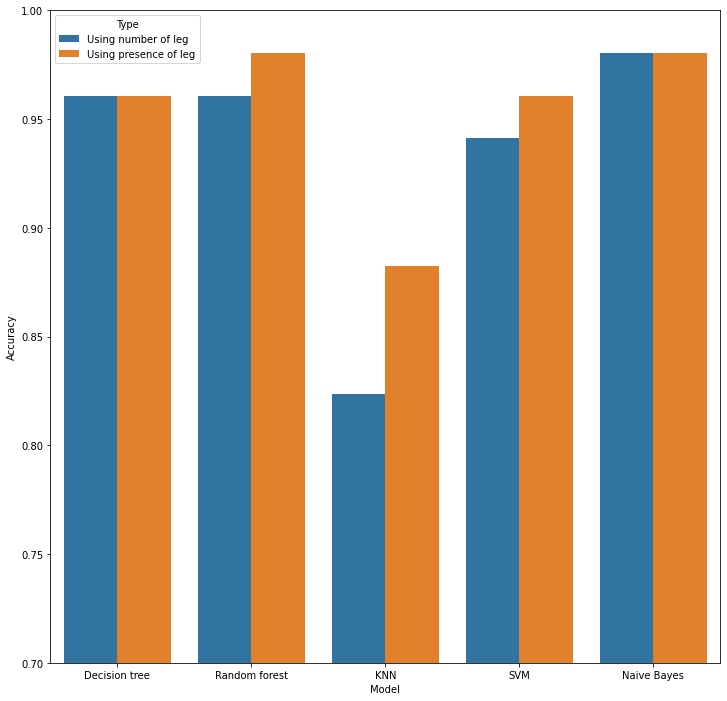

In [93]:
sns.barplot(x='Model', y='Accuracy', hue='Type', data=df)
plt.ylim([0.7,1])
# plt.tight_layout()
# plt.legend(loc='upper left')

plt.show()

<h2> 8.2. So sánh cross validation score </h2>

In [94]:
print(cv_all)
print(cv_leg_all)

df_cv = pd.DataFrame(data=zip(model, cv_all, cv_leg_all), columns=['Model', 'Using number of leg', 'Using presence of leg'])
df_cv

[0.95, 0.97, 0.890909090909091, 0.9400000000000001, 0.96]
[0.95, 0.96, 0.9400000000000001, 0.96, 0.96]


,Model,Using number of leg,Using presence of leg
0,Decision tree,0.950000,0.95
1,Random forest,0.970000,0.96
2,KNN,0.890909,0.94
3,SVM,0.940000,0.96
4,Naive Bayes,0.960000,0.96


In [95]:
df_melt = pd.melt(df_cv, id_vars="Model", var_name="Type", value_name="Cross Validation Score")
df_melt

,Model,Type,Cross Validation Score
0,Decision tree,Using number of leg,0.950000
1,Random forest,Using number of leg,0.970000
2,KNN,Using number of leg,0.890909
3,SVM,Using number of leg,0.940000
4,Naive Bayes,Using number of leg,0.960000
5,Decision tree,Using presence of leg,0.950000
6,Random forest,Using presence of leg,0.960000
7,KNN,Using presence of leg,0.940000
8,SVM,Using presence of leg,0.960000
9,Naive Bayes,Using presence of leg,0.960000


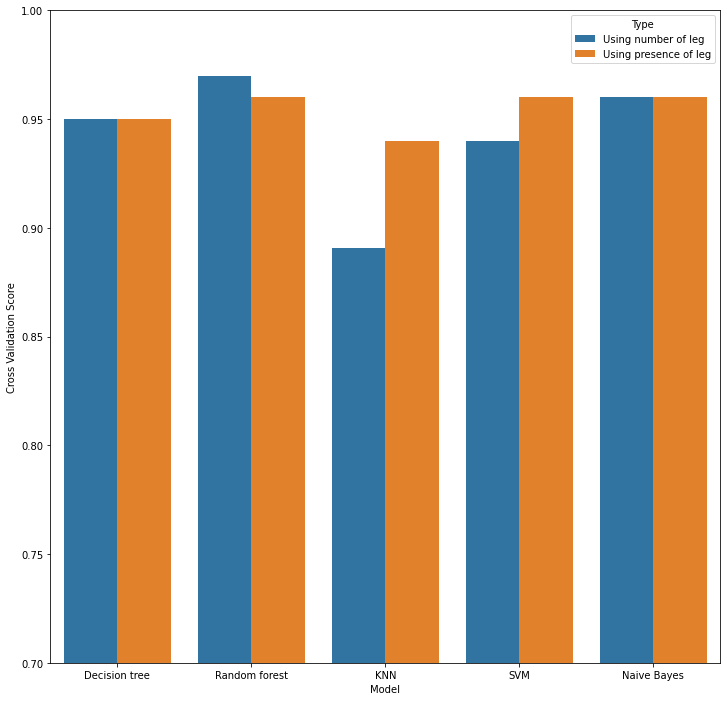

In [96]:
sns.barplot(x='Model', y='Cross Validation Score', hue='Type', data=df_melt)
plt.ylim([0.7,1])
# plt.tight_layout()
# plt.legend(loc='upper left')

plt.show()